<a href="https://colab.research.google.com/github/DeepthiVReddy/Credit-Risk-modeling/blob/main/Credit_Risk_Modeling_and_Business_Impact_Analysis_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

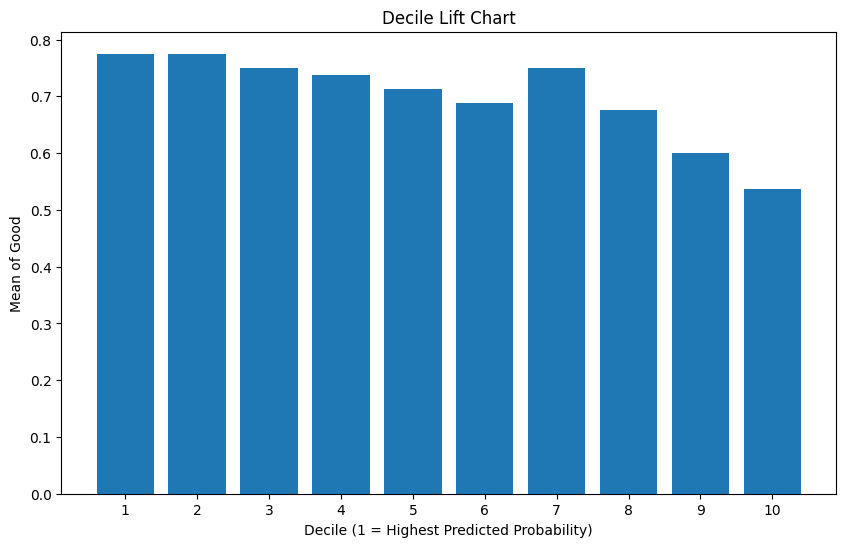

In [ ]:
# Step 1: Calculate predicted probabilities safely
try:
    train_data = train_data.copy()  # Ensure we work on a copy to avoid warnings
    train_data['pred_good'] = result.predict(X_train.clip(-700, 700))  # Clip extreme values to prevent overflow
except Exception as e:
    print(f"Error during prediction: {e}")

# Step 2: Create deciles in reverse order
try:
    train_data['pred_good_dec'] = pd.qcut(train_data['pred_good'], 10, labels=False, duplicates='drop') + 1
    train_data['pred_good_dec'] = 11 - train_data['pred_good_dec']  # Reverse the order
except Exception as e:
    print(f"Error during decile creation: {e}")

# Step 3: Calculate the mean of "Good" for each decile
try:
    decile_means = train_data.groupby('pred_good_dec')['Good'].mean()
except Exception as e:
    print(f"Error during grouping or aggregation: {e}")

# Step 4: Visualize the decile lift chart
try:
    plt.figure(figsize=(10, 6))
    plt.bar(decile_means.index, decile_means.values, tick_label=decile_means.index)
    plt.xlabel('Decile (1 = Highest Predicted Probability)')
    plt.ylabel('Mean of Good')
    plt.title('Decile Lift Chart')
    plt.show()
except Exception as e:
    print(f"Error during visualization: {e}")


Q3)Deciles and Probabilities:

The chart shows the mean probability of being a "Good" credit risk across 10 deciles.
Decile 1 corresponds to the highest predicted probabilities, while Decile 10 has the lowest.
Deciles with Mean Probability > 85%:

Based on the chart, no decile appears to have a mean probability higher than 85%. The highest mean in Decile 1 seems to be close to 80%.
Conclusion:
Number of Deciles with >85% Probability: 0.
No deciles have a mean probability of being a good credit risk exceeding 85%.







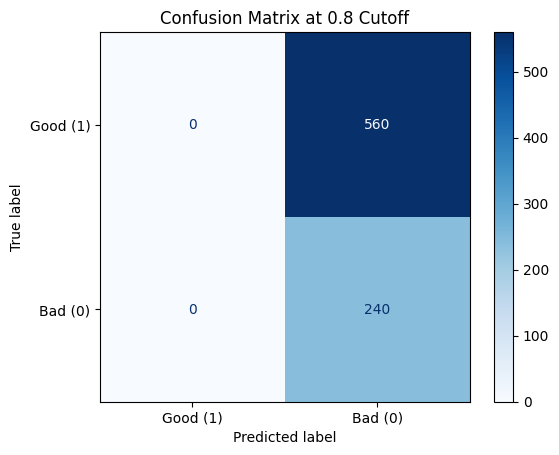

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Recode `pred_good` into a dummy variable `pred_good_point8`
train_predictions['pred_good_point8'] = (train_predictions['pred_good'] >= 0.8).astype(int)

# Step 2: Produce the confusion matrix
y_true = train_predictions['Good']  # Actual values
y_pred = train_predictions['pred_good_point8']  # Predicted values based on cutoff

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good (1)", "Bad (0)"])

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix at 0.8 Cutoff')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Load the data
data = pd.read_csv("GermanCredit.csv")

# Split the data into training and validation sets
train_data = data.iloc[:800]  # First 800 observations as training set
validation_data = data.iloc[800:]  # Last 200 observations as validation set

# Define the dependent variable (target) and independent variables
X_train = train_data.loc[:, "CreditDuration":"ForeignWorker"]  # Independent variables
y_train = train_data["Good"]  # Dependent variable

# Fit the logistic regression model using statsmodels
X_train_const = sm.add_constant(X_train)  # Add a constant for the intercept
logit_model = sm.Logit(y_train, X_train_const)  # Initialize the logistic regression model
result = logit_model.fit()  # Fit the model

# Print the summary of the logistic regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.512561
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      779
Method:                           MLE   Df Model:                           20
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1609
Time:                        01:19:22   Log-Likelihood:                -410.05
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 2.507e-23
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8000      0.986      2.840      0.005       0.868       4.732
CreditDu

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('GermanCredit.csv')

# Define the target and independent variables
target = 'Good'
categorical_vars = [
    'CreditPurpose', 'DebtorGuarantor', 'CheckingAccount', 'SavingsAccount',
    'CreditHistory', 'OtherInstallment', 'Female', 'Employment', 'PropertyOwnership',
    'Housing', 'Job', 'Telephone', 'ForeignWorker'
]
numerical_vars = [
    'CreditDuration', 'CreditAmount', 'InstallmentPct', 'ExistingCredit', 'Age', 'ResidenceYears', 'Dependent'
]

# Create dummy variables for categorical variables
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Get the updated list of independent variables
independent_vars = numerical_vars + [col for col in data.columns if any(var in col for var in categorical_vars)]

# Split the data into training and validation sets
train_data = data.iloc[:800]
validation_data = data.iloc[800:]

# Separate the independent variables (X) and the dependent variable (y) for training
X_train = train_data[independent_vars]
y_train = train_data[target]

# Ensure all data is numeric
X_train = X_train.astype(float)
y_train = y_train.astype(int)

# Add a constant to the independent variables (required for statsmodels logistic regression)
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())




Optimization terminated successfully.
         Current function value: 0.440473
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      753
Method:                           MLE   Df Model:                           46
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2789
Time:                        01:23:31   Log-Likelihood:                -352.38
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 6.091e-34
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4784      1.412      3.879      0.000       2.710       8.247
Cr

Q1)1.CreditPurpose=1

Coefficient: 1.6769

Interpretation:
The baseline group for CreditPurpose is the category that was omitted (likely CreditPurpose=0).
A consumer with CreditPurpose=1 (e.g., Used Car) has a log odds of being a good credit risk that is 1.6769 units higher than a consumer with the baseline CreditPurpose=0 (e.g., New Car), holding all other variables constant.
To express this in terms of odds:
Odds Ratio= e1.6769 ≈ 5.35
This means that consumers with CreditPurpose=1 are about 5.35 times more likely to be a good credit risk compared to the baseline group, all else being equal.

2. Interpretation of InstallmentPct

Coefficient: -0.3286

Interpretation:
For each 1-unit increase in InstallmentPct (installment as a percentage of disposable income), the log odds of being a good credit risk decrease by 0.3286 units, holding all other variables constant.
In terms of odds:
Odds Ratio=e-0.3286 ≈ 0.72
This means that for every unit increase in InstallmentPct, the odds of being a good credit risk are multiplied by 0.72 (or decrease by 28%), all else being equal.
.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('GermanCredit.csv')

# Step 2: Define independent (X) and dependent (y) variables
# Use all variables from CreditDuration to ForeignWorker as independent variables
X = data.loc[:, "CreditDuration":"ForeignWorker"]
y = data["Good"]

# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Step 5: Calculate sample means and modes for the training data
means = X_train.mean()
modes = X_train.mode().iloc[0]

# Step 6: Create input data for predictions
# Base input with means for continuous variables and modes for categorical variables
base_input = means.copy()
for col in X_train.select_dtypes(include=["object", "category"]).columns:
    base_input[col] = modes[col]

# Create two inputs: CreditPurpose=1 and CreditPurpose=0
input_credit_1 = base_input.copy()
input_credit_1["CreditPurpose"] = 1  # Set CreditPurpose to 1

input_credit_0 = base_input.copy()
input_credit_0["CreditPurpose"] = 0  # Set CreditPurpose to 0

# Convert inputs to DataFrame
input_credit_1 = pd.DataFrame([input_credit_1])
input_credit_0 = pd.DataFrame([input_credit_0])

# Step 7: Predict probabilities
prob_credit_1 = model.predict_proba(input_credit_1)[:, 1][0]  # Probability for Good=1
prob_credit_0 = model.predict_proba(input_credit_0)[:, 1][0]

# Step 8: Convert probabilities to log odds
log_odds_credit_1 = np.log(prob_credit_1 / (1 - prob_credit_1))
log_odds_credit_0 = np.log(prob_credit_0 / (1 - prob_credit_0))

# Step 9: Calculate the difference in log odds
log_odds_difference = log_odds_credit_1 - log_odds_credit_0

# Step 10: Print results
print(f"Probability for CreditPurpose=1: {prob_credit_1:.4f}")
print(f"Log Odds for CreditPurpose=1: {log_odds_credit_1:.4f}")
print(f"Probability for CreditPurpose=0: {prob_credit_0:.4f}")
print(f"Log Odds for CreditPurpose=0: {log_odds_credit_0:.4f}")
print(f"Difference in Log Odds: {log_odds_difference:.4f}")



Probability for CreditPurpose=1: 0.7096
Log Odds for CreditPurpose=1: 0.8935
Probability for CreditPurpose=0: 0.6983
Log Odds for CreditPurpose=0: 0.8391
Difference in Log Odds: 0.0544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data
data = pd.read_csv("GermanCredit.csv")

# Split the data into training (first 800) and validation (last 200) sets
train = data.iloc[:800]
validation = data.iloc[800:]

# Define the dependent variable and the independent variables
dependent_var = "Good"
independent_vars = [
    "CreditDuration", "CreditPurpose", "CreditAmount", "InstallmentPct", "DebtorGuarantor",
    "CheckingAccount", "SavingsAccount", "CreditHistory", "ExistingCredit", "OtherInstallment",
    "Age", "Female", "Employment", "ResidenceYears", "PropertyOwnership", "Housing",
    "Job", "Dependent", "Telephone", "ForeignWorker"
]

# Convert categorical variables to `category` dtype
categorical_vars = [
    "CreditPurpose", "DebtorGuarantor", "CheckingAccount", "SavingsAccount",
    "CreditHistory", "OtherInstallment", "Female", "Employment", "PropertyOwnership",
    "Housing", "Job", "Telephone", "ForeignWorker"
]

for var in categorical_vars:
    train[var] = train[var].astype("category")

# Build the logistic regression model using `statsmodels`
formula = f"{dependent_var} ~ " + " + ".join(independent_vars)
model = smf.logit(formula=formula, data=train).fit()

# Print the summary of the logistic regression model
print(model.summary())


<ipython-input-20-567084fc81a3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[var] = train[var].astype("category")


Optimization terminated successfully.
         Current function value: 0.440473
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      753
Method:                           MLE   Df Model:                           46
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2789
Time:                        02:18:44   Log-Likelihood:                -352.38
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 6.091e-34
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.4784      1.412      3.879      0.000       2.710      

In [ ]:
# Get the most frequent category for categorical variables in the training set
most_frequent_categories = {}
for var in categorical_vars:
    most_frequent_categories[var] = train[var].mode()[0]

# Get the sample means for continuous variables in the training set
continuous_vars = [
    "CreditDuration", "CreditAmount", "InstallmentPct", "ExistingCredit", "Age", "ResidenceYears", "Dependent"
]
sample_means = train[continuous_vars].mean()

# Create two new observations: one with CreditPurpose=1 and another with CreditPurpose=0
base_observation = {}
for var in categorical_vars:
    base_observation[var] = most_frequent_categories[var]

for var in continuous_vars:
    base_observation[var] = sample_means[var]

# Create two observations for prediction
observation_credit_purpose_0 = base_observation.copy()
observation_credit_purpose_0["CreditPurpose"] = 0

observation_credit_purpose_1 = base_observation.copy()
observation_credit_purpose_1["CreditPurpose"] = 1

# Convert observations to DataFrame for prediction
observation_df = pd.DataFrame([observation_credit_purpose_0, observation_credit_purpose_1])

# Predict probabilities using the logistic regression model
observation_df["predicted_probability"] = model.predict(observation_df)

# Convert probabilities to log odds
observation_df["log_odds"] = observation_df["predicted_probability"].apply(lambda p: np.log(p / (1 - p)))

# Calculate the difference in log odds
log_odds_difference = observation_df.loc[1, "log_odds"] - observation_df.loc[0, "log_odds"]

# Print the results
print("Predicted probabilities:")
print(observation_df[["CreditPurpose", "predicted_probability"]])
print("\nLog odds:")
print(observation_df[["CreditPurpose", "log_odds"]])
print("\nDifference in log odds (CreditPurpose=1 - CreditPurpose=0):", log_odds_difference)


Predicted probabilities:
   CreditPurpose  predicted_probability
0              0               0.705192
1              1               0.927510

Log odds:
   CreditPurpose  log_odds
0              0  0.872148
1              1  2.549052

Difference in log odds (CreditPurpose=1 - CreditPurpose=0): 1.6769047953032636


<ipython-input-23-705baf9b583f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_means = X_train.groupby("pred_good_dec")["Good"].mean()


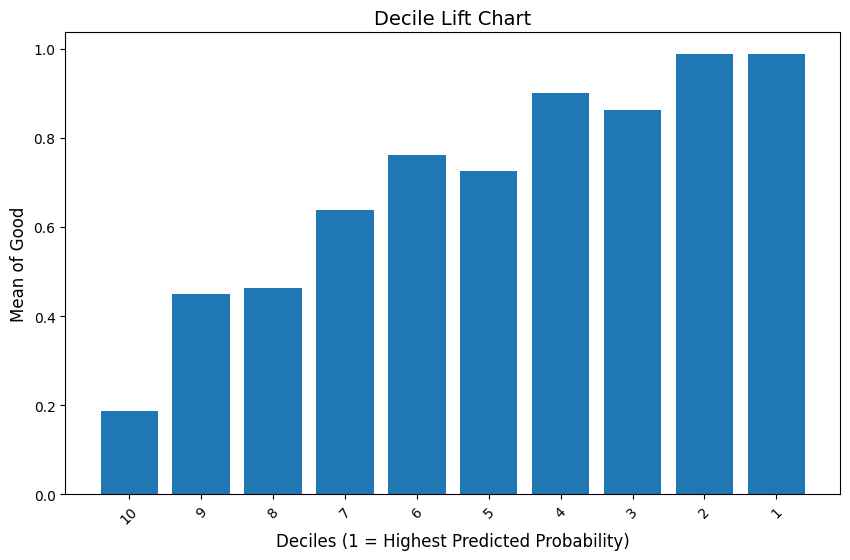

In [ ]:
# Step 1: Predict probabilities using the trained model
X_train["pred_good"] = model.predict(X_train)  # Probability of Good=1 using statsmodels' predict

# Step 2: Create deciles
X_train["pred_good_dec"] = pd.qcut(X_train["pred_good"], 10, labels=range(10, 0, -1))

# Step 3: Calculate mean of 'Good' for each decile
X_train["Good"] = y_train  # Add the target variable back to the training set
decile_means = X_train.groupby("pred_good_dec")["Good"].mean()

# Step 4: Plot the decile lift chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(decile_means.index.astype(str), decile_means)
plt.xlabel("Deciles (1 = Highest Predicted Probability)", fontsize=12)
plt.ylabel("Mean of Good", fontsize=12)
plt.title("Decile Lift Chart", fontsize=14)
plt.xticks(rotation=45)
plt.show()


<ipython-input-24-cd949256f6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good"] = model.predict(train)
<ipython-input-24-cd949256f6d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good_dec"] = pd.qcut(train["pred_good"], 10, labels=False, duplicates="drop")
<ipython-input-24-cd949256f6d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

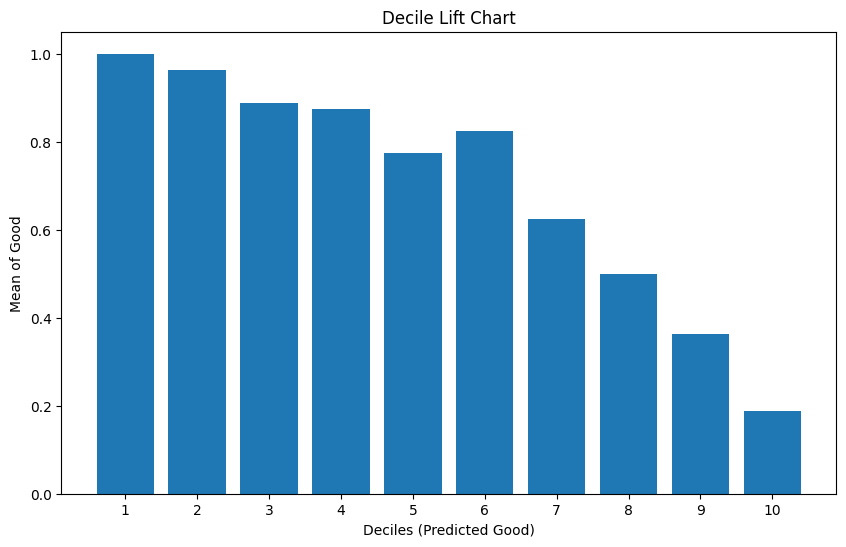

Number of deciles with mean value of Good > 85%: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the probability of "Good=1" for each observation in the training set
train["pred_good"] = model.predict(train)

# Recode "pred_good" into deciles (reverse order)
train["pred_good_dec"] = pd.qcut(train["pred_good"], 10, labels=False, duplicates="drop")
train["pred_good_dec"] = 10 - train["pred_good_dec"]  # Reverse order to match requirements

# Calculate the mean of "Good" for each decile
decile_means = train.groupby("pred_good_dec")["Good"].mean()

# Plot the decile lift chart
plt.figure(figsize=(10, 6))
plt.bar(decile_means.index, decile_means, width=0.8)
plt.title("Decile Lift Chart")
plt.xlabel("Deciles (Predicted Good)")
plt.ylabel("Mean of Good")
plt.xticks(decile_means.index)
plt.show()

# Count deciles with mean value of "Good" greater than 85%
deciles_above_85 = (decile_means > 0.85).sum()

# Print the number of deciles above 85%
print("Number of deciles with mean value of Good > 85%:", deciles_above_85)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Predict probabilities
X_train["pred_good"] = model.predict(X_train)  # Predicted probabilities for Good=1

# Step 2: Create pred_good_point8 (dummy variable using cutoff 0.8)
X_train["pred_good_point8"] = (X_train["pred_good"] >= 0.8).astype(int)

# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_train, X_train["pred_good_point8"])
tn, fp, fn, tp = conf_matrix.ravel()  # Extract True Negative, False Positive, False Negative, True Positive

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Step 4: Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

# Step 5: Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")


Confusion Matrix:
[[203  40]
 [210 347]]
Sensitivity: 0.62
Specificity: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict the probability of "Good=1" for each observation in the training set
train["pred_good"] = model.predict(train)

# Recode "pred_good" into dummy variable "pred_good_point8"
train["pred_good_point8"] = (train["pred_good"] >= 0.8).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(train["Good"], train["pred_good_point8"])
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print confusion matrix, sensitivity, and specificity
print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Confusion Matrix:
[[202  38]
 [211 349]]

Sensitivity (True Positive Rate): 0.6232142857142857
Specificity (True Negative Rate): 0.8416666666666667


<ipython-input-26-fcca8d830417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good"] = model.predict(train)
<ipython-input-26-fcca8d830417>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good_point8"] = (train["pred_good"] >= 0.8).astype(int)


In [ ]:
# Calculate the number of credit applications automatically approved (pred_good_point8 = 1)
approved_applications = train["pred_good_point8"].sum()

# Among those approved, calculate how many are good credit risks (Good=1) and bad credit risks (Good=0)
good_risks_approved = train[(train["pred_good_point8"] == 1) & (train["Good"] == 1)].shape[0]
bad_risks_approved = train[(train["pred_good_point8"] == 1) & (train["Good"] == 0)].shape[0]

# Calculate the percentage of good credit risks among the automatically approved applications
percentage_good_risks = (good_risks_approved / approved_applications) * 100

# Print results
print("Number of credit applications automatically approved:", approved_applications)
print("Number of good credit risks among approved applications:", good_risks_approved)
print("Number of bad credit risks among approved applications:", bad_risks_approved)
print("Percentage of good credit risks among approved applications: {:.2f}%".format(percentage_good_risks))


Number of credit applications automatically approved: 387
Number of good credit risks among approved applications: 349
Number of bad credit risks among approved applications: 38
Percentage of good credit risks among approved applications: 90.18%


In [ ]:
# Extract TP and FP from the confusion matrix
# Confusion matrix elements: [TN, FP, FN, TP]
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate total number of approved applications
approved_applications = tp + fp

# Calculate the percentage of good credit risks among approved applications
percentage_good_risks = (tp / approved_applications) * 100

# Print results
print("Total number of approved applications (TP + FP):", approved_applications)
print("Number of good credit risks among approved applications (TP):", tp)
print("Number of bad credit risks among approved applications (FP):", fp)
print("Percentage of good credit risks among approved applications: {:.2f}%".format(percentage_good_risks))


Total number of approved applications (TP + FP): 387
Number of good credit risks among approved applications (TP): 349
Number of bad credit risks among approved applications (FP): 38
Percentage of good credit risks among approved applications: 90.18%


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Add the interaction term
X_train["interaction"] = X_train["CheckingAccount"] * X_train["CreditAmount"]

# Step 2: Fit the new logistic regression model
X_with_interaction = sm.add_constant(X_train[["CreditAmount", "CheckingAccount", "interaction"]])
model_with_interaction = sm.Logit(y_train, X_with_interaction).fit()

# Print summary of the new model
print(model_with_interaction.summary())

# Step 3: Calculate marginal effects for each CheckingAccount group
coeffs = model_with_interaction.params
marginal_effects = {}
for checking_value in [1, 2, 3]:  # Example groups
    marginal_effect = coeffs["CreditAmount"] + coeffs["interaction"] * checking_value
    marginal_effects[checking_value] = marginal_effect
    print(f"Marginal Effect for CheckingAccount={checking_value}: {marginal_effect:.4f}")

# Step 4: Interpret the interaction term
interaction_coeff = coeffs["interaction"]
if interaction_coeff > 0:
    print("The effect of CreditAmount on Good=1 increases as CheckingAccount increases.")
elif interaction_coeff < 0:
    print("The effect of CreditAmount on Good=1 decreases as CheckingAccount increases.")
else:
    print("No interaction effect between CreditAmount and CheckingAccount.")


Optimization terminated successfully.
         Current function value: 0.577513
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      796
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.05944
Time:                        03:12:25   Log-Likelihood:                -462.01
converged:                       True   LL-Null:                       -491.21
Covariance Type:            nonrobust   LLR p-value:                 1.296e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8072      0.198      9.107      0.000       1.418       2.196
CreditAmount  

In [ ]:
import statsmodels.api as sm

# Step 1: Add the interaction term
X_train["interaction"] = X_train["CheckingAccount"] * X_train["CreditAmount"]

# Step 2: Fit the logistic regression model with the interaction term
X_with_interaction = sm.add_constant(X_train[["CreditAmount", "CheckingAccount", "interaction"]])
model_with_interaction = sm.Logit(y_train, X_with_interaction).fit()

# Print summary of the model
print(model_with_interaction.summary())

# Step 3: Calculate marginal effect of CreditAmount for different CheckingAccount values
coeffs = model_with_interaction.params
checking_values = [1, 2, 3]  # Example values for CheckingAccount
marginal_effects = {}

print("\nMarginal Effects for CreditAmount:")
for checking_value in checking_values:
    marginal_effect = coeffs["CreditAmount"] + coeffs["interaction"] * checking_value
    marginal_effects[checking_value] = marginal_effect
    print(f"CheckingAccount={checking_value}: {marginal_effect:.4f}")


Optimization terminated successfully.
         Current function value: 0.577513
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      796
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.05944
Time:                        03:14:36   Log-Likelihood:                -462.01
converged:                       True   LL-Null:                       -491.21
Covariance Type:            nonrobust   LLR p-value:                 1.296e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8072      0.198      9.107      0.000       1.418       2.196
CreditAmount  

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Add the interaction term
X_train["interaction"] = X_train["CheckingAccount"] * X_train["CreditAmount"]

# Step 2: Define the independent variables (including the interaction term)
X_with_interaction = sm.add_constant(X_train[["CreditAmount", "CheckingAccount", "interaction"]])

# Step 3: Fit the logistic regression model
model_with_interaction = sm.Logit(y_train, X_with_interaction).fit()

# Step 4: Print the summary of the updated model
print(model_with_interaction.summary())


Optimization terminated successfully.
         Current function value: 0.577513
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      796
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.05944
Time:                        03:15:33   Log-Likelihood:                -462.01
converged:                       True   LL-Null:                       -491.21
Covariance Type:            nonrobust   LLR p-value:                 1.296e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8072      0.198      9.107      0.000       1.418       2.196
CreditAmount  

In [ ]:
# Add interaction term between CheckingAccount and CreditAmount
train["CheckingAccount_CreditAmount"] = train["CheckingAccount"].astype(int) * train["CreditAmount"]

# Define the formula with the interaction term
formula_with_interaction = (
    "Good ~ CreditDuration + CreditPurpose + CreditAmount + InstallmentPct + DebtorGuarantor + "
    "CheckingAccount + SavingsAccount + CreditHistory + ExistingCredit + OtherInstallment + Age + "
    "Female + Employment + ResidenceYears + PropertyOwnership + Housing + Job + Dependent + "
    "Telephone + ForeignWorker + CheckingAccount_CreditAmount"
)

# Build the logistic regression model with the interaction term
model_with_interaction = smf.logit(formula=formula_with_interaction, data=train).fit()

# Calculate the marginal effect of CreditAmount
marginal_effects = model_with_interaction.get_margeff(at='overall', method='dydx')
credit_amount_effect = marginal_effects.summary_frame().loc["CreditAmount"]

# Print the model summary and marginal effect
print(model_with_interaction.summary())
print("\nMarginal Effect of CreditAmount:")
print(credit_amount_effect)







Optimization terminated successfully.
         Current function value: 0.440284
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      752
Method:                           MLE   Df Model:                           47
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2792
Time:                        03:25:30   Log-Likelihood:                -352.23
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 1.319e-33
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.5144      1.413      3.902      0.000

In [ ]:
import statsmodels.formula.api as smf

# Add interaction term between CheckingAccount and CreditAmount
formula_with_interaction = (
    "Good ~ CreditDuration + CreditPurpose + CreditAmount + InstallmentPct + DebtorGuarantor + "
    "CheckingAccount + SavingsAccount + CreditHistory + ExistingCredit + OtherInstallment + Age + "
    "Female + Employment + ResidenceYears + PropertyOwnership + Housing + Job + Dependent + "
    "Telephone + ForeignWorker + CheckingAccount:CreditAmount"
)

# Fit the model with the interaction term
model_with_interaction = smf.logit(formula=formula_with_interaction, data=train).fit()

# Print summary of the new model
print(model_with_interaction.summary())

# Marginal effect of CreditAmount
marginal_effect = model_with_interaction.params["CreditAmount"]
print("\nMarginal Effect of CreditAmount on the dependent variable:", marginal_effect)

# Interpret interaction for CheckingAccount=3
interaction_term = model_with_interaction.params["CheckingAccount[T.3]:CreditAmount"]
print("\nInteraction term for CheckingAccount=3 and CreditAmount:", interaction_term)

# Interpretation:
# The coefficient of the interaction term shows how the effect of CreditAmount changes
# when CheckingAccount=3 compared to the baseline category of CheckingAccount.
# The marginal effect of CreditAmount will be the sum of its base coefficient and the interaction
# term coefficient when CheckingAccount=3.
marginal_effect_checking_3 = marginal_effect + interaction_term
print(
    "Marginal Effect of CreditAmount on the dependent variable when CheckingAccount=3:",
    marginal_effect_checking_3,
)


Optimization terminated successfully.
         Current function value: 0.434955
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      750
Method:                           MLE   Df Model:                           49
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2880
Time:                        03:27:28   Log-Likelihood:                -347.96
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 2.229e-34
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             5.6967      1.435      3

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the probability of "Good=1" for the validation set
validation["pred_good"] = model.predict(validation)

# Recode "pred_good" into dummy variable "pred_good_point8"
validation["pred_good_point8"] = (validation["pred_good"] >= 0.8).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(validation["Good"], validation["pred_good_point8"])
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print confusion matrix, sensitivity, and specificity
print("Confusion Matrix (Validation Set):")
print(conf_matrix)
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Confusion Matrix (Validation Set):
[[51  9]
 [56 84]]

Sensitivity (True Positive Rate): 0.6
Specificity (True Negative Rate): 0.85


<ipython-input-40-22d0de5b9292>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good"] = model.predict(validation)
<ipython-input-40-22d0de5b9292>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good_point8"] = (validation["pred_good"] >= 0.8).astype(int)


In [ ]:
# Step 1: Automatically approved credit applications (pred_good >= 0.8)
automatically_approved = validation[validation["pred_good"] >= 0.8]

# Step 2: Total number of automatically approved applications
num_approved = len(automatically_approved)

# Step 3: Sum of credit amounts for automatically approved applications
sum_credit_amount = automatically_approved["CreditAmount"].sum()

# Step 4: Percentage of good credit risks among approved applications from Q5
# Assuming `percentage_good_risks` from Q5
# (Replace percentage_good_risks with the actual value if needed)
# percentage_good_risks = TP / (TP + FP) * 100

# Calculate the expected number of good credit risks among approved applications in validation set
expected_good_risks = num_approved * (percentage_good_risks / 100)

# Print the results
print("Number of automatically approved credit applications:", num_approved)
print("Sum of credit amounts for automatically approved applications:", sum_credit_amount)
print("Expected number of good credit risks among automatically approved applications:", expected_good_risks)


Number of automatically approved credit applications: 93
Sum of credit amounts for automatically approved applications: 261801
Expected number of good credit risks among automatically approved applications: 83.86821705426357


In [ ]:
# Predict probabilities (pred_good) for the validation set using the model
validation["pred_good"] = model.predict(validation)

# Classify applications as approved if pred_good >= 0.8
validation["approved"] = (validation["pred_good"] >= 0.8).astype(int)

# Count the number of approved applications
num_approved = validation["approved"].sum()

# Calculate the total CreditAmount for approved applications
total_credit_amount_approved = validation.loc[validation["approved"] == 1, "CreditAmount"].sum()

# Percentage of good credit risks among approved applications from Q5 (90.18%)
percentage_good_risks = 90.18

# Estimate the number of good and bad credit risks in the approved applications
num_good_risks = int(num_approved * (percentage_good_risks / 100))
num_bad_risks = num_approved - num_good_risks

# Print results
print("Number of approved applications:", num_approved)
print("Total CreditAmount for approved applications:", total_credit_amount_approved)
print("Estimated number of good credit risks among approved applications:", num_good_risks)
print("Estimated number of bad credit risks among approved applications:", num_bad_risks)




Number of approved applications: 93
Total CreditAmount for approved applications: 261801
Estimated number of good credit risks among approved applications: 83
Estimated number of bad credit risks among approved applications: 10


<ipython-input-45-91ef0b5fffdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good"] = model.predict(validation)
<ipython-input-45-91ef0b5fffdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["approved"] = (validation["pred_good"] >= 0.8).astype(int)
